In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold

In [2]:
# Load the dataset
df = pd.read_csv('cardekho_dataset (1).csv')

In [3]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [5]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [6]:
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [7]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [8]:
df.shape

(15411, 13)

In [9]:
print(df.dtypes)

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object


C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

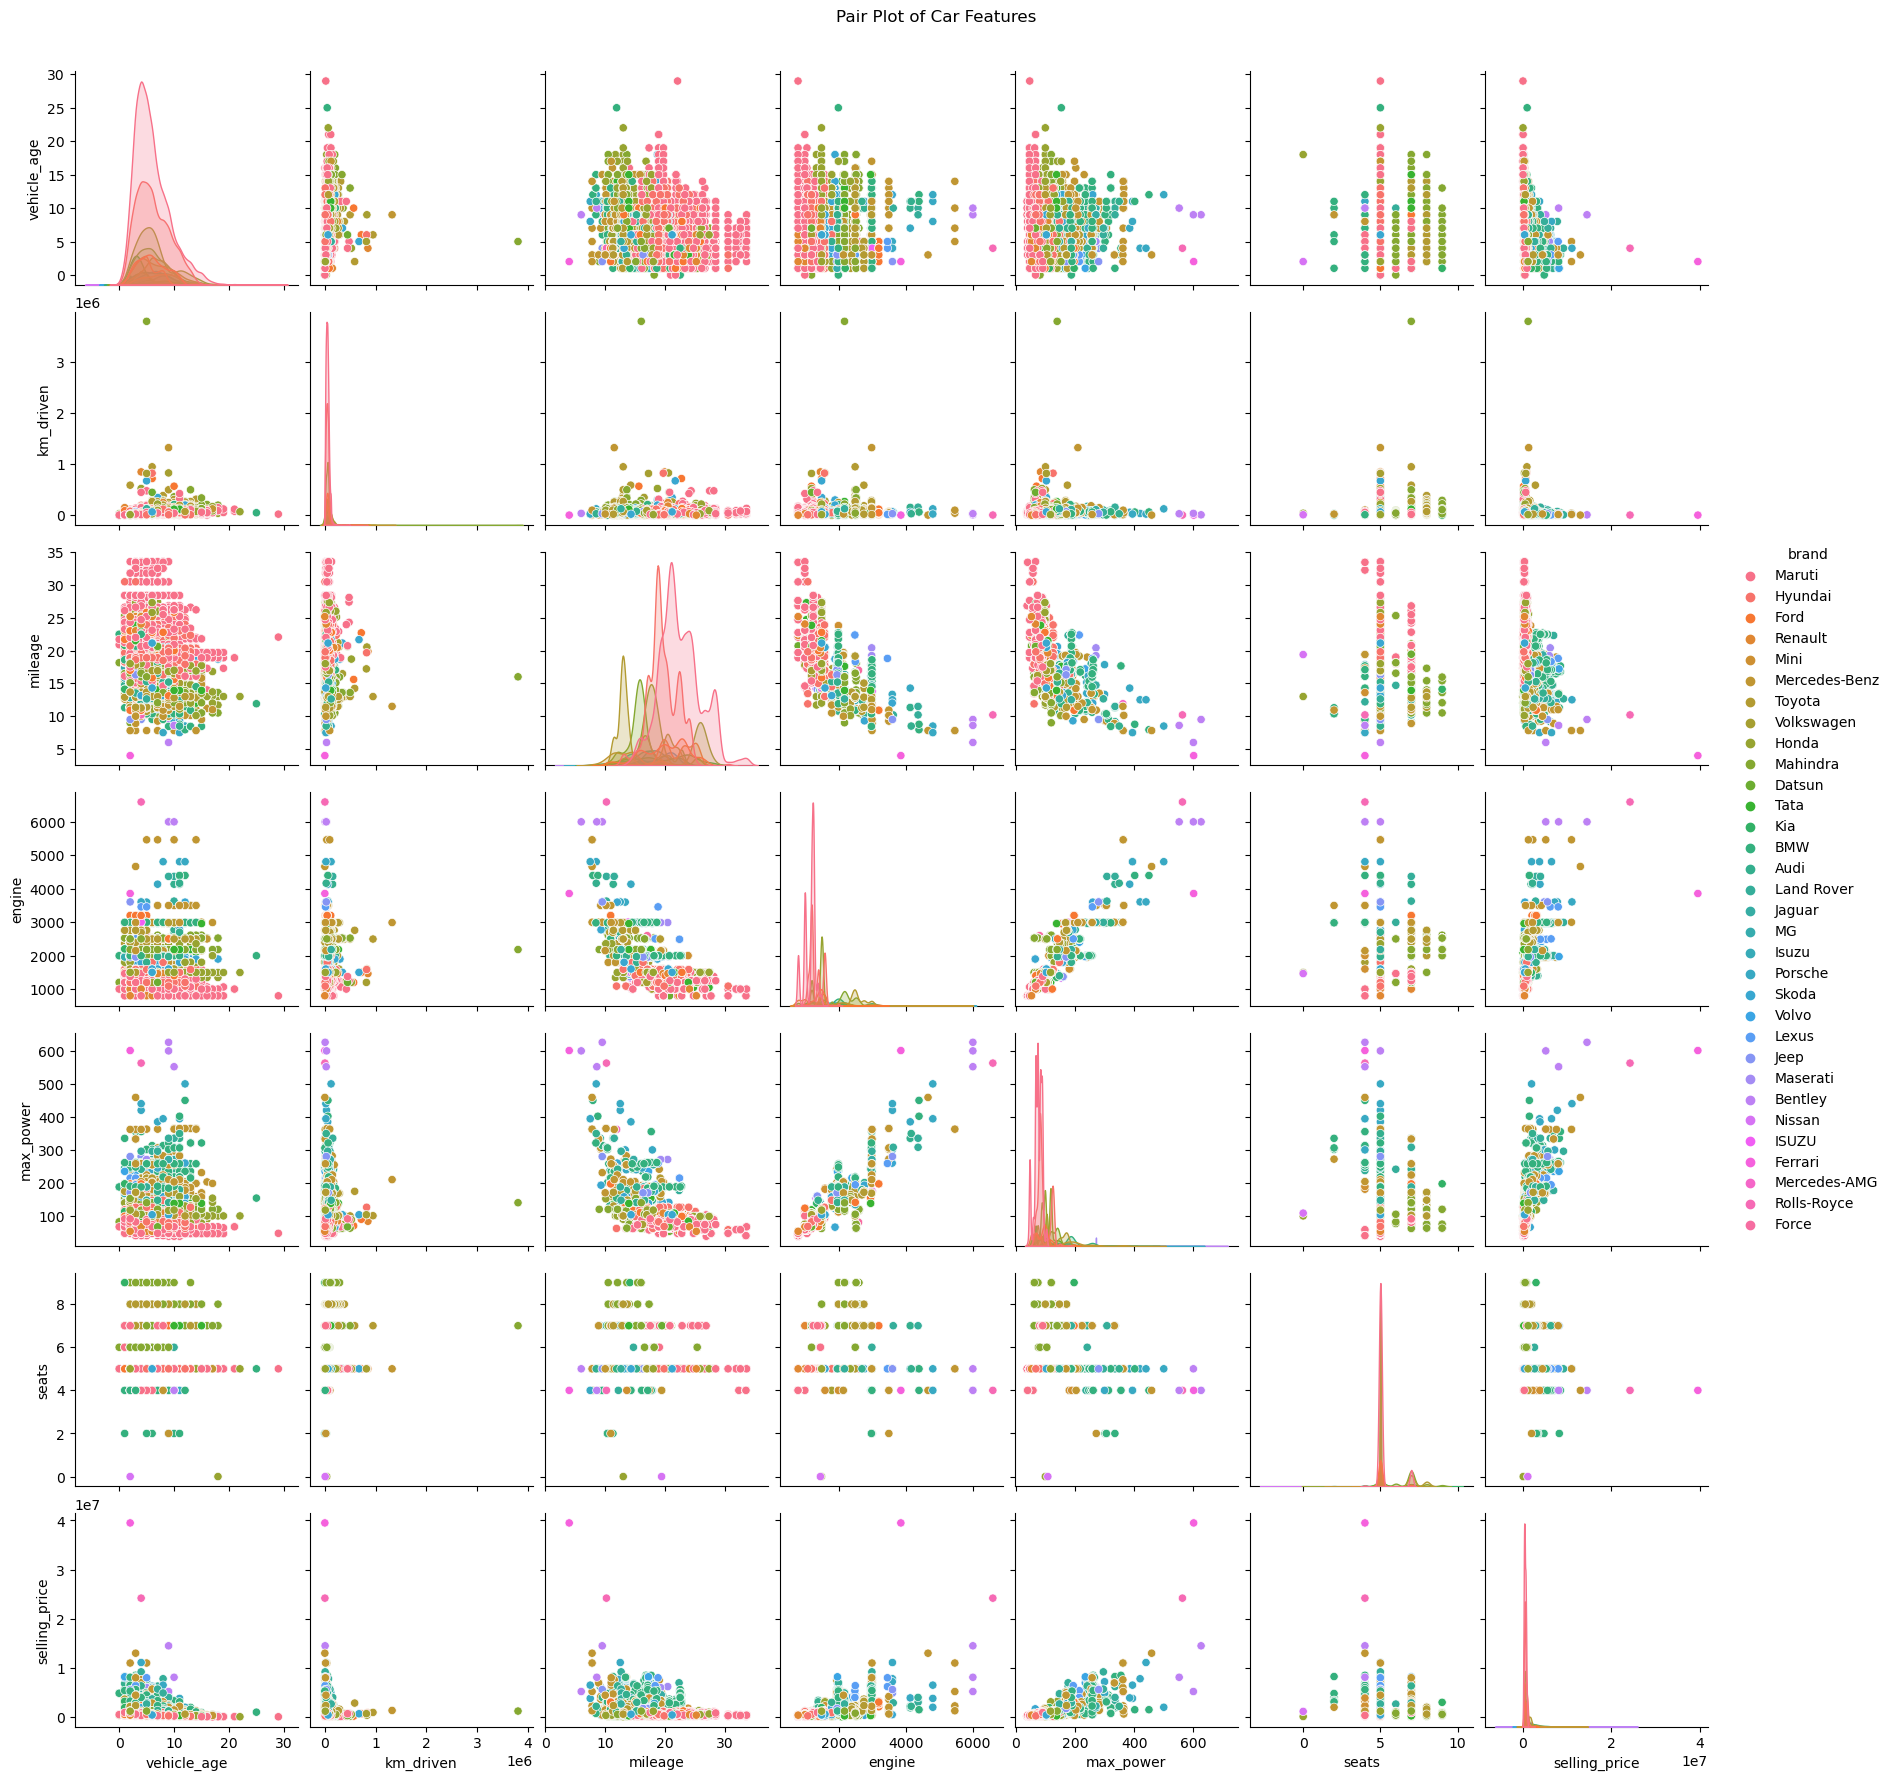

In [10]:
sns.pairplot(df, diag_kind='auto', hue='brand', markers='o')

plt.suptitle("Pair Plot of Car Features", y=1.02)

# Show the plot
plt.show()

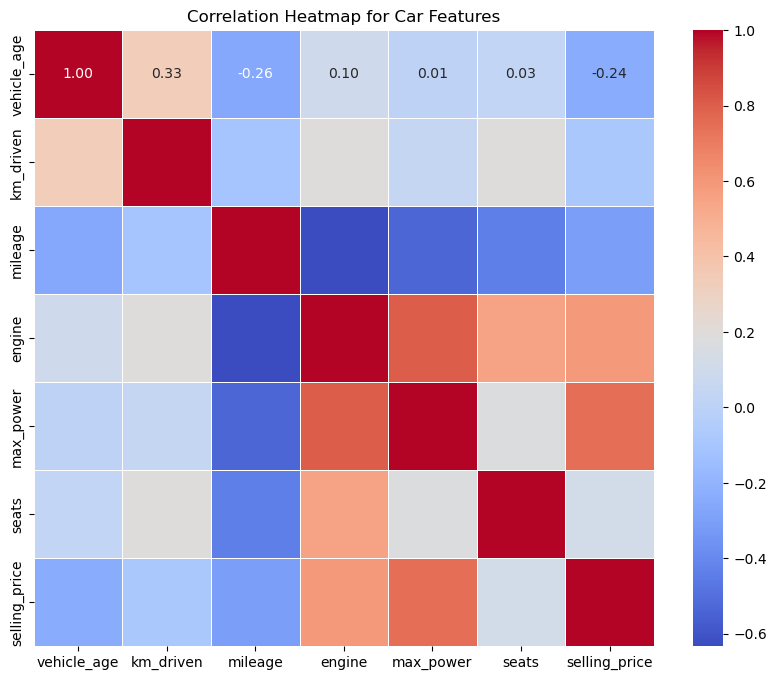

In [11]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlations = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Car Features')
plt.show()

In [12]:
# Features and target
X = df[[ 'vehicle_age', 'max_power']]
#X=df.drop('selling_price',axis=1)
y = df['selling_price']
X

,vehicle_age,max_power
0,9,46.30
1,5,82.00
2,11,80.00
3,9,67.10
4,6,98.59
...,...,...
15406,9,68.05
15407,2,91.10
15408,6,103.52
15409,5,140.00


In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [14]:
X_train[:5]

,vehicle_age,max_power
658,2,171.50
14010,4,74.00
6742,9,67.10
7588,8,126.32
14586,11,157.80


In [15]:
X_test[:5]

,vehicle_age,max_power
6141,6,74.02
3563,7,74.00
848,2,147.80
9634,5,53.64
12165,9,138.10


In [16]:
# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predictions
y_pred = model.predict(X_test)

In [18]:
y_pred

array([ 363017.58925658,  289775.9646459 , 1812754.68817396, ...,
       1759204.23623937,  959010.26578282,  581800.72311536])

In [19]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 0.674549030686626


In [20]:
type(X_train)

pandas.core.frame.DataFrame

In [21]:
print(X_train.isnull().sum())  # Should output 0 for all columns
print(y_train.isnull().sum())  # Should output 0

vehicle_age    0
max_power      0
dtype: int64
0


In [22]:
import numpy as np
print(np.isinf(X_train).sum())  # Should output 0 for all columns
print(np.isinf(y_train).sum())  # Should output 0

vehicle_age    0
max_power      0
dtype: int64
0


In [23]:
# Ridge Regression
# ridge = Ridge(alpha=0.098)  # alpha is the regularization parameter
ridge = Ridge(alpha=0.098, solver='sag')  # Using 'sag' solver
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
r2 = r2_score(y_test, ridge_predictions)
print(f"R^2 Score: {r2}")

R^2 Score: 0.6745468994996084


In [24]:
# lasso Regression
lasso = Lasso(alpha=0.8)  # alpha is the regularization parameter
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
r2 = r2_score(y_test, lasso_predictions)
print(f"R^2 Score: {r2}")

R^2 Score: 0.6745490313716793


In [25]:
# Elastic Net Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.1)  # alpha is the regularization parameter, l1_ratio controls the mix of L1 and L2
elastic_net.fit(X_train, y_train)
elastic_net_predictions = elastic_net.predict(X_test)
r2 = r2_score(y_test, elastic_net_predictions)
print(f"R^2 Score: {r2}")

R^2 Score: 0.6745438025979518


In [26]:
# Perform K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
cv_scores

array([0.67479249, 0.66166611, 0.63193495, 0.65539181, 0.53696465])

In [27]:
print("Coefficients:", model.coef_)

Coefficients: [-72927.71128626  15695.66622082]


In [28]:
intercept = model.intercept_
intercept

-361209.3566911827

In [29]:
coef_vehicle_age, coef_max_power = model.coef_
coef_vehicle_age

-72927.71128626246

In [30]:
Predicted_selling_price = intercept + (coef_max_power * df['max_power'])
Predicted_selling_price

0        3.655000e+05
1        9.258353e+05
2        8.944439e+05
3        6.919698e+05
4        1.186226e+06
             ...     
15406    7.068807e+05
15407    1.068666e+06
15408    1.263606e+06
15409    1.836184e+06
15410    1.484601e+06
Name: max_power, Length: 15411, dtype: float64